In [37]:
import matplotlib.pyplot as plt
import numpy as np
import vedo

from histalign.backend.ccf.paths import get_atlas_path, get_structure_mask_path
from histalign.backend.io import load_alignment_settings, load_image, load_volume
from histalign.backend.maths import compute_origin
from histalign.backend.models import Orientation, Resolution
from histalign.backend.registration.alignment import (
    build_aligned_array,
    generate_aligned_planes,
)
from histalign.backend.workspace import VolumeSlicer

vedo.settings.default_backend = "vtk"

In [38]:
resolution = Resolution.MICRONS_100
orientation = Orientation.CORONAL

In [39]:
atlas_path = get_atlas_path(resolution)
atlas_volume = load_volume(atlas_path, return_raw_array=True)

In [40]:
alignment_settings = load_alignment_settings(
    "/home/ediun/histalign-projects/tmp/1a862cb4e4/c03f0da7780a179927a3f87cd94e9ab6.json"
)

In [41]:
build_aligned_array(
    "/home/ediun/histalign-projects/tmp/1a862cb4e4",
    projection_regex="",
    channel_regex="",
    channel_index="",
    force=True,
)

(66.0, 39.0, 56.0)


In [42]:
aligned_path = (
    "/home/ediun/histalign-projects/tmp/1a862cb4e4/volumes/aligned/1a862cb4e4.h5"
)
aligned_volume = load_volume(aligned_path, return_raw_array=True)

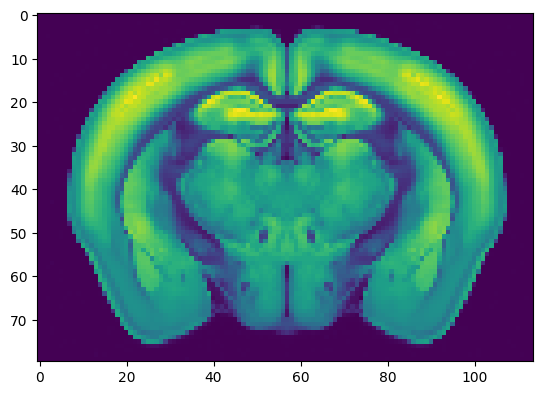

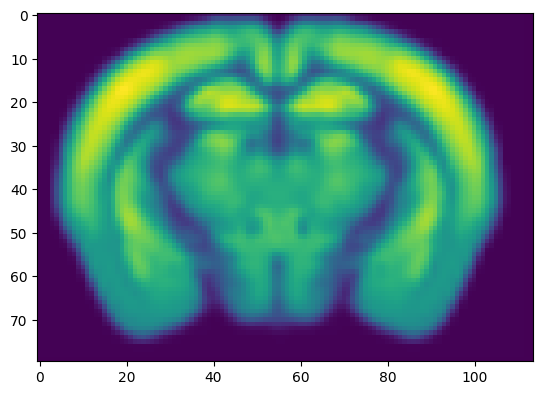

In [43]:
plt.imshow(atlas_volume[66])
plt.show()

plt.imshow(aligned_volume[66])
plt.show()

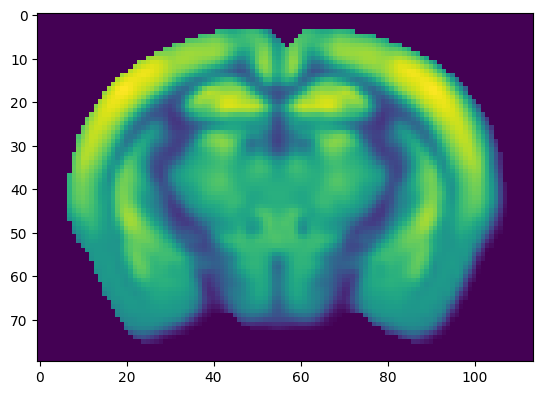

In [44]:
mask = get_structure_mask_path("root", Resolution.MICRONS_100)
mask = load_volume(mask, return_raw_array=True)

plt.imshow(np.where(mask[66], aligned_volume[66], 0))
plt.show()

In [45]:
atlas_slicer = VolumeSlicer(volume=vedo.Volume(atlas_volume))
aligned_slicer = VolumeSlicer(volume=vedo.Volume(aligned_volume))

In [46]:
atlas_plane: vedo.Plane = atlas_slicer.slice(
    alignment_settings.volume_settings, return_plane_mesh=True
)
aligned_plane = aligned_slicer.slice(
    alignment_settings.volume_settings, return_plane_mesh=True, interpolation="nearest"
)

In [47]:
(np.array(atlas_volume.shape) - 1) // 2

array([65, 39, 56])

In [48]:
points = vedo.Points([(66, i, j) for i in range(80) for j in range(114)])

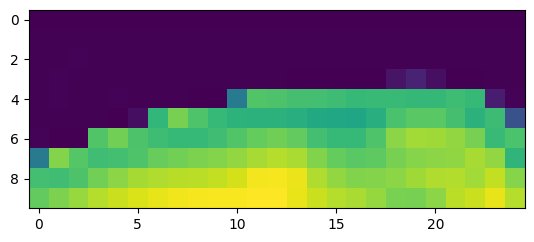

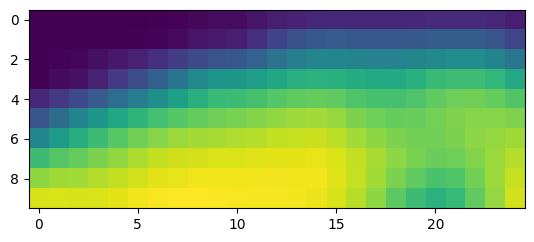

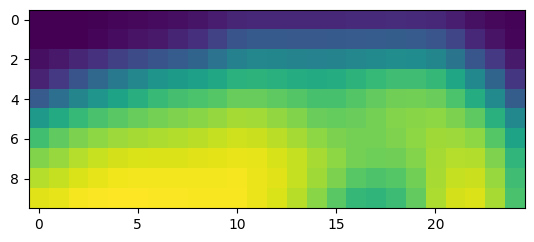

In [49]:
roi = (slice(None, 10), slice(30, 55))

plt.imshow(
    atlas_plane.pointdata["ImageScalars"].reshape(atlas_plane.metadata["shape"])[roi]
)
plt.show()

plt.imshow(
    aligned_plane.pointdata["ImageScalars"].reshape(aligned_plane.metadata["shape"])[
        roi
    ]
)
plt.show()

plt.imshow(
    points.probe(aligned_plane)
    .pointdata["ImageScalars"]
    .reshape(aligned_plane.metadata["shape"])[roi]
)
plt.show()

In [50]:
volume = vedo.Volume(np.zeros(atlas_volume.shape, dtype=np.uint8))

planes = generate_aligned_planes(volume, [alignment_settings])

(66.0, 39.0, 56.0)



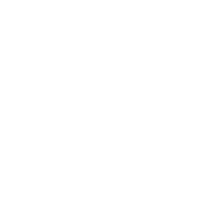

In [51]:
atlas_plane


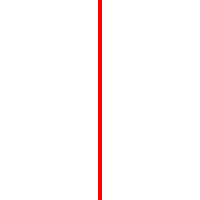

In [52]:
planes[0]

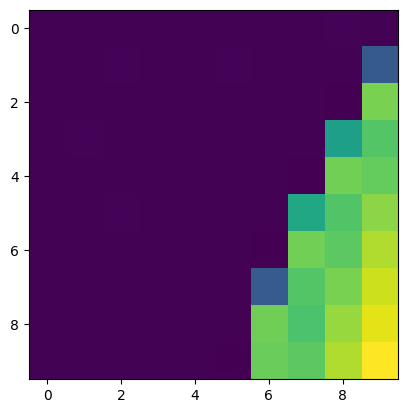

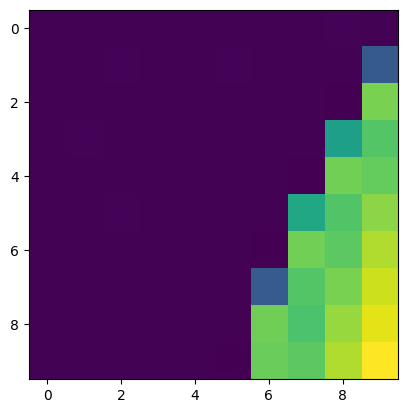

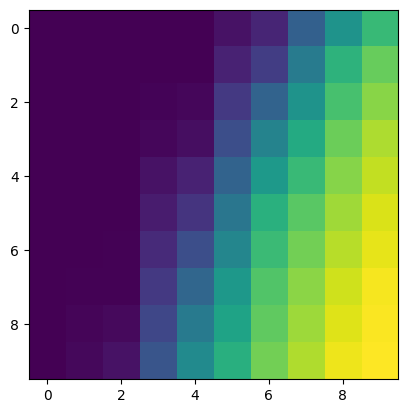

In [53]:
roi = (slice(80, 90), slice(45, 55))

atlas_image = atlas_slicer.slice(alignment_settings.volume_settings)
plt.imshow(atlas_image[roi])
plt.show()

image = load_image("/home/ediun/tmp/datasets/coronal/artificial_2d/normal/image_1.h5")
plt.imshow(image[roi])
plt.show()

image = load_image("/home/ediun/tmp/datasets/coronal/artificial_2d/normal/image_1.h5")
plt.imshow(planes[0].pointdata["ImageScalars"].reshape(image.shape)[roi])
plt.show()

In [54]:
# vedo.show(
#     [
#         # atlas_plane,
#         aligned_plane,
#         vedo.Point((65, 39, 56)),
#     ],
#     interactive=False,
# ).interactive().close();